# 21 Finding and Understanding Relations in the Data

In [6]:
import pandas as pd
df = pd.read_csv("data/housing.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
df2= df.loc[:, df.columns != 'ocean_proximity']
df2.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [8]:
df.total_rooms.corr(df.households)

0.9184844926543082

## More than linear correlation

In [4]:
from  discover_feature_relationships import discover

In [9]:
rel = discover.discover(df.sample(500))
rel

,feature,target,score
0,latitude,longitude,0.893865
1,housing_median_age,longitude,-0.077628
2,total_rooms,longitude,-0.429022
3,total_bedrooms,longitude,-0.386208
4,population,longitude,-0.393774
...,...,...,...
85,total_bedrooms,ocean_proximity,-0.258304
86,population,ocean_proximity,-0.646235
87,households,ocean_proximity,-0.496913
88,median_income,ocean_proximity,-0.415903


In [10]:
beyond_corr = rel.pivot(index="target", columns="feature", values="score").fillna(1)
beyond_corr

feature,households,housing_median_age,latitude,longitude,median_house_value,median_income,ocean_proximity,population,total_bedrooms,total_rooms
target,,,,,,,,,,
households,1.000000,-0.230378,-0.294762,-0.340993,-0.494503,-0.549222,-0.013649,0.625085,0.931968,0.706106
housing_median_age,-0.355029,1.000000,-0.156320,-0.025528,-0.389352,-0.420255,0.092348,-0.137947,-0.360623,-0.263197
latitude,-0.612033,-0.141063,1.000000,0.882752,-0.414821,-0.437777,0.295228,-0.367373,-0.356144,-0.443115
longitude,-0.604441,-0.077628,0.893865,1.000000,-0.467147,-0.498748,0.245239,-0.393774,-0.386208,-0.429022
median_house_value,-0.401683,-0.126300,-0.075588,-0.053841,1.000000,0.311996,0.263071,-0.410714,-0.516648,-0.469467
median_income,-0.416053,-0.173926,-0.391939,-0.381318,0.247794,1.000000,0.054616,-0.417997,-0.618280,-0.404626
ocean_proximity,-0.496913,-0.091170,0.274841,0.402576,-0.303571,-0.415903,1.000000,-0.646235,-0.258304,-0.430095
population,0.691738,-0.133486,-0.235888,-0.368264,-0.611275,-0.607861,-0.004533,1.000000,0.656327,0.498659
total_bedrooms,0.938935,-0.145901,-0.288223,-0.425943,-0.484241,-0.600349,-0.017876,0.582100,1.000000,0.703850


<Axes: xlabel='feature', ylabel='target'>

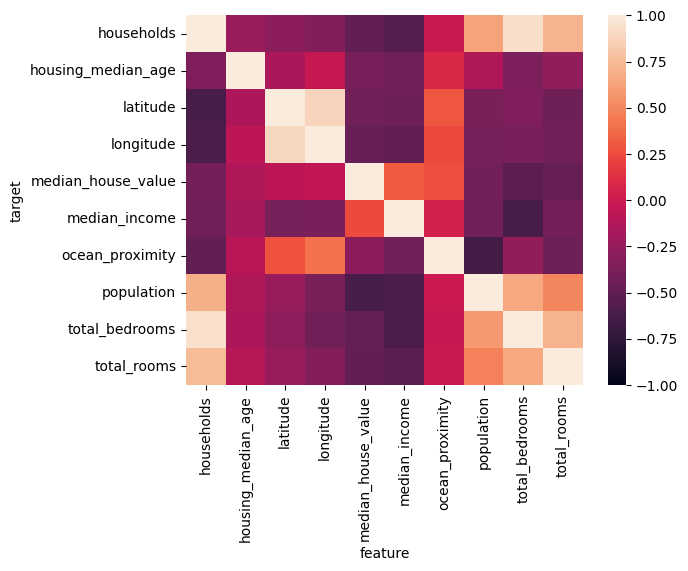

In [11]:
import seaborn as sns
sns.heatmap (beyond_corr, vmin=-1, vmax=1)

## Indexing

In [31]:
df = df.set_index("latitude")


In [32]:
df.index

Index([37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37.84, 37.84, 37.84,
       ...
       39.29, 39.33, 39.26, 39.19, 39.27, 39.48, 39.49, 39.43, 39.43, 39.37],
      dtype='float64', name='latitude', length=20640)

In [34]:
df.loc[37.85,:]

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
latitude,,,,,,,,,
37.85,-122.24,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
37.85,-122.25,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
37.85,-122.25,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
37.85,-122.25,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
37.85,-122.26,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY
37.85,-122.26,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY
37.85,-122.26,52.0,2491.0,474.0,1098.0,468.0,3.0750,213500.0,NEAR BAY
37.85,-122.26,52.0,2643.0,626.0,1212.0,620.0,1.9167,159200.0,NEAR BAY
37.85,-122.26,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,NEAR BAY


## Inde Slicing

In [35]:
df.iloc[5:500,:]

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
latitude,,,,,,,,,
37.85,-122.25,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
37.84,-122.25,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
37.84,-122.25,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
37.84,-122.26,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
37.84,-122.25,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
37.86,-122.25,52.0,4048.0,663.0,1316.0,590.0,5.3794,376900.0,NEAR BAY
37.85,-122.26,52.0,3618.0,768.0,1508.0,755.0,3.2619,309600.0,NEAR BAY
37.85,-122.27,52.0,4076.0,920.0,1800.0,815.0,2.7054,182300.0,NEAR BAY


In [37]:
# df[["latitude", "population"]] # Now working as latitude is part of index
df[["longitude", "population"]]

,longitude,population
latitude,,
37.88,-122.23,322.0
37.86,-122.22,2401.0
37.85,-122.24,496.0
37.85,-122.25,558.0
37.85,-122.25,565.0
...,...,...
39.48,-121.09,845.0
39.49,-121.21,356.0
39.43,-121.22,1007.0


## Selecting Columns

In [44]:
df.drop(["longitude", "population"], axis=1)

,housing_median_age,total_rooms,total_bedrooms,households,median_income,median_house_value,ocean_proximity
latitude,,,,,,,
37.88,41.0,880.0,129.0,126.0,8.3252,452600.0,NEAR BAY
37.86,21.0,7099.0,1106.0,1138.0,8.3014,358500.0,NEAR BAY
37.85,52.0,1467.0,190.0,177.0,7.2574,352100.0,NEAR BAY
37.85,52.0,1274.0,235.0,219.0,5.6431,341300.0,NEAR BAY
37.85,52.0,1627.0,280.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...
39.48,25.0,1665.0,374.0,330.0,1.5603,78100.0,INLAND
39.49,18.0,697.0,150.0,114.0,2.5568,77100.0,INLAND
39.43,17.0,2254.0,485.0,433.0,1.7000,92300.0,INLAND


In [45]:
df.drop([37.85], axis=0)

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
latitude,,,,,,,,,
37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
37.84,-122.25,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
37.84,-122.25,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
37.84,-122.26,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...
39.48,-121.09,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
39.49,-121.21,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
39.43,-121.22,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND


## Why?

In [46]:
df.describe()

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [48]:
df.loc[df["longitude"]<-122].describe()

,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3967.000000,3967.000000,3967.000000,3927.000000,3967.000000,3967.000000,3967.000000,3967.000000
mean,-122.408072,33.831107,2461.945551,497.507003,1203.207714,468.308546,4.103604,244230.881775
std,0.423863,13.270992,1710.886064,341.984939,842.230630,325.648578,2.048455,127889.888450
min,-124.350000,2.000000,8.000000,1.000000,8.000000,1.000000,0.499900,14999.000000
25%,-122.470000,23.000000,1440.000000,287.000000,699.500000,270.000000,2.708300,140900.000000
50%,-122.300000,34.000000,2104.000000,417.000000,1019.000000,395.000000,3.729200,226500.000000
75%,-122.160000,46.000000,3010.000000,612.500000,1479.000000,575.500000,5.001450,331500.000000
max,-122.010000,52.000000,18634.000000,3226.000000,8276.000000,3589.000000,15.000100,500001.000000
